In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import re
sns.set()
sys.path.append('../../')
from Code.python_scripts.functions.data import readFilesFromDirectory, readEnergyFromFile, read_table, read_atoms


# Convergence

## Vacuum 

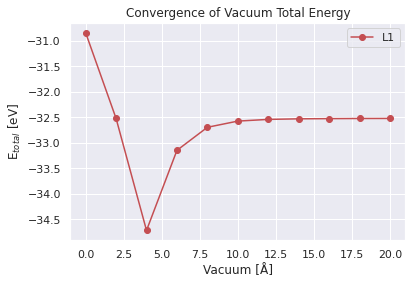

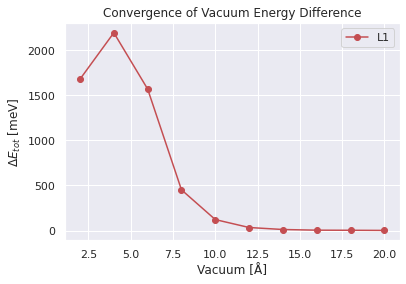

,Vacuum [Å],$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
0,0.0,-30.842645,NaN
1,2.0,-32.523892,1681.25
2,4.0,-34.720515,2196.62
3,6.0,-33.149405,1571.11
4,8.0,-32.697511,451.894
5,10.0,-32.576047,121.464
6,12.0,-32.542593,33.4533
7,14.0,-32.531414,11.1789
8,16.0,-32.527677,3.73774
9,18.0,-32.524935,2.74155


\begin{longtable}{rrl}
\toprule
 Vacuum [Å] &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
        0.0 &         -30.843 &                    NaN \\
        2.0 &         -32.524 &                1681.25 \\
        4.0 &         -34.721 &                2196.62 \\
        6.0 &         -33.149 &                1571.11 \\
        8.0 &         -32.698 &                451.894 \\
       10.0 &         -32.576 &                121.464 \\
       12.0 &         -32.543 &                33.4533 \\
       14.0 &         -32.531 &                11.1789 \\
       16.0 &         -32.528 &                3.73774 \\
       18.0 &         -32.525 &                2.74155 \\
       20.0 &         -32.524 &                1.07041 \\
\end{longtable}



In [2]:
thisdir = '../Layers/convergence_Results/L1'
filepaths, filenames = readFilesFromDirectory(thisdir)
data1 = readEnergyFromFile(filepaths, filenames)

vacuum = np.linspace(0, 20, 11)
l1 = pd.DataFrame({"Vacuum [Å]": vacuum, "$E_{tot}$ [eV]": data1['vacuum.txt']})


diff = []
diff.append('NaN')
for i in range(1, len(data1['vacuum.txt'])):
    temp_value = (abs(data1['vacuum.txt'][i] - data1['vacuum.txt'][i-1])*1000)
    diff.append((temp_value))

l1['$\Delta E_{tot}$ [meV]'] = diff

plt.title('Convergence of Vacuum Total Energy')
plt.xlabel("Vacuum [Å]")
plt.ylabel("E$_{total}$ [eV]")
plt.plot(vacuum, l1['$E_{tot}$ [eV]'], "-or", label='L1')
plt.legend(loc="upper right")
plt.show()

plt.title('Convergence of Vacuum Energy Difference')
plt.xlabel("Vacuum [Å]")
plt.ylabel("$\Delta E_{tot}$ [meV]")
plt.plot(vacuum[1:], l1['$\Delta E_{tot}$ [meV]'][1:], "-or", label='L1')
plt.legend(loc="upper right")
plt.show()

display(l1)
l1 = l1.round(3)
print(l1.to_latex(index = False, multirow = True, longtable = True)) 


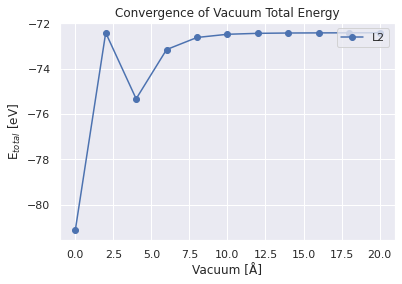

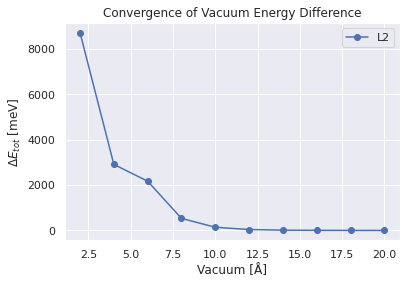

,Vacuum [Å],$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
0,0.0,-81.126685,NaN
1,2.0,-72.413832,8712.85
2,4.0,-75.326125,2912.29
3,6.0,-73.155085,2171.04
4,8.0,-72.622354,532.731
5,10.0,-72.481231,141.123
6,12.0,-72.439810,41.4209
7,14.0,-72.425718,14.0919
8,16.0,-72.420102,5.61592
9,18.0,-72.416867,3.23531


\begin{longtable}{rrl}
\toprule
 Vacuum [Å] &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
        0.0 &         -81.127 &                    NaN \\
        2.0 &         -72.414 &                8712.85 \\
        4.0 &         -75.326 &                2912.29 \\
        6.0 &         -73.155 &                2171.04 \\
        8.0 &         -72.622 &                532.731 \\
       10.0 &         -72.481 &                141.123 \\
       12.0 &         -72.440 &                41.4209 \\
       14.0 &         -72.426 &                14.0919 \\
       16.0 &         -72.420 &                5.61592 \\
       18.0 &         -72.417 &                3.23531 \\
       20.0 &         -72.415 &                2.12483 \\
\end{longtable}



In [3]:
thisdir = '../Layers/convergence_Results/L2'
filepaths, filenames = readFilesFromDirectory(thisdir)
data2 = readEnergyFromFile(filepaths, filenames)

l2 = pd.DataFrame({"Vacuum [Å]": vacuum, "$E_{tot}$ [eV]": data2['vacuum.txt']})

diff = []
diff.append('NaN')
for i in range(1, len(data2['vacuum.txt'])):
    temp_value = (abs(data2['vacuum.txt'][i] - data2['vacuum.txt'][i-1])*1000)
    diff.append((temp_value))
    
l2['$\Delta E_{tot}$ [meV]'] = diff


plt.title('Convergence of Vacuum Total Energy')
plt.plot(vacuum, l2['$E_{tot}$ [eV]'], "-ob", label='L2')
plt.legend(loc="upper right")
plt.xlabel("Vacuum [Å]")
plt.ylabel("E$_{total}$ [eV]")
plt.show()

plt.title('Convergence of Vacuum Energy Difference')
plt.plot(vacuum[1:], l2['$\Delta E_{tot}$ [meV]'][1:], "-ob", label='L2')
plt.legend(loc="upper right")
plt.xlabel("Vacuum [Å]")
plt.ylabel("$\Delta E_{tot}$ [meV]")
plt.show()

display(l2)
l2 = l2.round(3)
print(l2.to_latex(index = False, multirow = True, longtable = True)) 


## Total Energy
Both for 1 layer and 2 layers

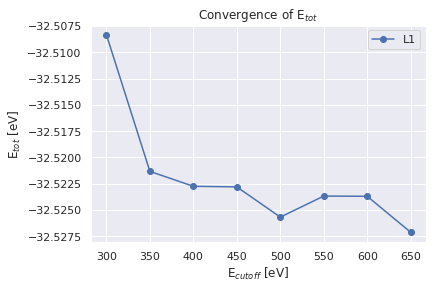

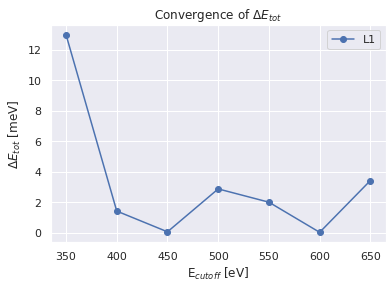

,$E_{cut}$ [ev],$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
0,300.0,-32.508317,NaN
1,350.0,-32.521323,13.0059
2,400.0,-32.522743,1.41934
3,450.0,-32.522800,0.05771
4,500.0,-32.525675,2.87496
5,550.0,-32.523672,2.00283
6,600.0,-32.523697,0.02449
7,650.0,-32.527122,3.42471


\begin{longtable}{rrl}
\toprule
 \$E\_\{cut\}\$ [ev] &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
          300.0 &         -32.508 &                    NaN \\
          350.0 &         -32.521 &                13.0059 \\
          400.0 &         -32.523 &                1.41934 \\
          450.0 &         -32.523 &                0.05771 \\
          500.0 &         -32.526 &                2.87496 \\
          550.0 &         -32.524 &                2.00283 \\
          600.0 &         -32.524 &                0.02449 \\
          650.0 &         -32.527 &                3.42471 \\
\end{longtable}



In [4]:
cutoff = np.linspace(300, 650, 8)
l1 = pd.DataFrame({"$E_{cut}$ [ev]": cutoff, "$E_{tot}$ [eV]": data1['ecut.txt'].dropna()})


diff = []
diff.append('NaN')
for i in range(1, len(l1['$E_{tot}$ [eV]'])):
    temp_value = (abs(l1['$E_{tot}$ [eV]'][i] - l1['$E_{tot}$ [eV]'][i-1])*1000)
    diff.append((temp_value))


l1['$\Delta E_{tot}$ [meV]'] = diff


plt.title('Convergence of E$_{tot}$')
plt.plot(cutoff, l1['$E_{tot}$ [eV]'], "-ob", label='L1')
plt.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{tot}$ [eV]")
plt.show()

plt.title('Convergence of $\Delta E_{tot}$')
plt.plot(cutoff[1:], l1['$\Delta E_{tot}$ [meV]'][1:], "-ob", label='L1')
plt.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("$\Delta E_{tot}$ [meV]")
plt.show()

display(l1)
l1 = l1.round(3)
print(l1.to_latex(index = False, multirow = True, longtable = True)) 



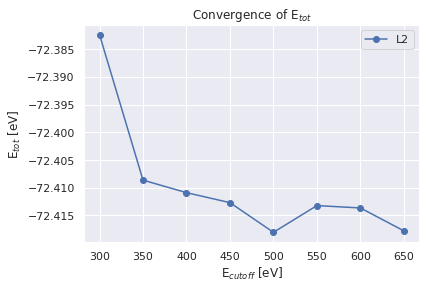

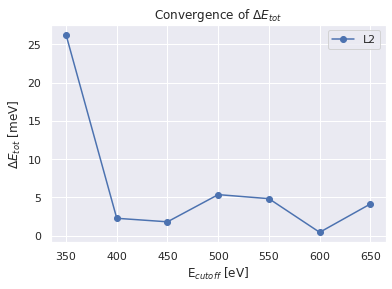

,$E_{cut}$ [ev],$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
0,300.0,-72.382356,NaN
1,350.0,-72.408616,26.2602
2,400.0,-72.410879,2.26321
3,450.0,-72.412681,1.80225
4,500.0,-72.418037,5.35568
5,550.0,-72.413211,4.82622
6,600.0,-72.413640,0.42942
7,650.0,-72.417776,4.13563


\begin{longtable}{rrl}
\toprule
 \$E\_\{cut\}\$ [ev] &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
          300.0 &         -72.382 &                    NaN \\
          350.0 &         -72.409 &                26.2602 \\
          400.0 &         -72.411 &                2.26321 \\
          450.0 &         -72.413 &                1.80225 \\
          500.0 &         -72.418 &                5.35568 \\
          550.0 &         -72.413 &                4.82622 \\
          600.0 &         -72.414 &                0.42942 \\
          650.0 &         -72.418 &                4.13563 \\
\end{longtable}



In [5]:
l2 = pd.DataFrame({"$E_{cut}$ [ev]": cutoff, "$E_{tot}$ [eV]": data2['ecut.txt'].dropna()})

diff = []
diff.append('NaN')
for i in range(1, len(l2['$E_{tot}$ [eV]'])):
    temp_value = (abs(l2['$E_{tot}$ [eV]'][i] - l2['$E_{tot}$ [eV]'][i-1])*1000)
    diff.append((temp_value))


l2['$\Delta E_{tot}$ [meV]'] = diff


plt.title('Convergence of E$_{tot}$')
plt.plot(cutoff, l2['$E_{tot}$ [eV]'], "-ob", label='L2')
plt.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("E$_{tot}$ [eV]")
plt.show()

plt.title('Convergence of $\Delta E_{tot}$')
plt.plot(cutoff[1:], l2['$\Delta E_{tot}$ [meV]'][1:], "-ob", label='L2')
plt.legend(loc="upper right")
plt.xlabel("E$_{cutoff}$ [eV]")
plt.ylabel("$\Delta E_{tot}$ [meV]")
plt.show()

display(l2)
l2 = l2.round(3)
print(l2.to_latex(index = False, multirow = True, longtable = True)) 

## Convergence test of the total energy per unit cell with respect to k-point density.

,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
3,(1x3x2),-32.538040,NaN
4,(1x4x3),-32.523154,14.8862
5,(1x5x3),-32.525748,2.59466
6,(1x6x4),-32.525644,0.10411
7,(1x7x4),-32.525698,0.05353
8,(1x8x5),-32.525675,0.02248
9,(1x9x5),-32.525678,0.00258


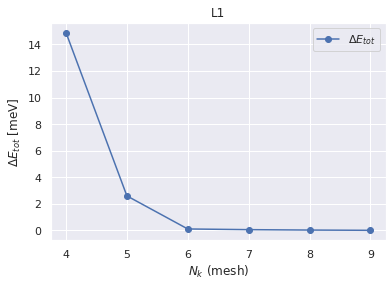

\begin{longtable}{llrl}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
3  &  (1x3x2) &         -32.538 &                    NaN \\
4  &  (1x4x3) &         -32.523 &                14.8862 \\
5  &  (1x5x3) &         -32.526 &                2.59466 \\
6  &  (1x6x4) &         -32.526 &                0.10411 \\
7  &  (1x7x4) &         -32.526 &                0.05353 \\
8  &  (1x8x5) &         -32.526 &                0.02248 \\
9  &  (1x9x5) &         -32.526 &                0.00258 \\
\end{longtable}



,mesh,$E_{tot}$ [eV],$\Delta E_{tot}$ [meV]
Nk,,,
3,(1x3x2),-72.427817,NaN
4,(1x4x3),-72.415213,12.6043
5,(1x5x3),-72.418111,2.8981
6,(1x6x4),-72.417997,0.11368
7,(1x7x4),-72.418049,0.05155
8,(1x8x5),-72.418037,0.01175
9,(1x9x5),-72.418038,0.00151


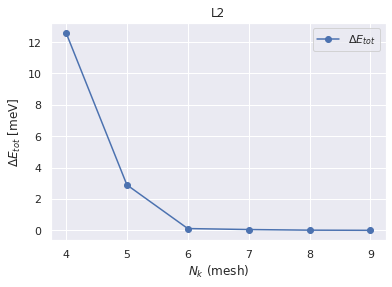

\begin{longtable}{llrl}
\toprule
{} &     mesh &  \$E\_\{tot\}\$ [eV] & \$\textbackslash Delta E\_\{tot\}\$ [meV] \\
Nk &          &                 &                        \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
3  &  (1x3x2) &         -72.428 &                    NaN \\
4  &  (1x4x3) &         -72.415 &                12.6043 \\
5  &  (1x5x3) &         -72.418 &                 2.8981 \\
6  &  (1x6x4) &         -72.418 &                0.11368 \\
7  &  (1x7x4) &         -72.418 &                0.05155 \\
8  &  (1x8x5) &         -72.418 &                0.01175 \\
9  &  (1x9x5) &         -72.418 &                0.00151 \\
\end{longtable}



In [6]:
kpoints = np.arange(3,10)
mesh = ['(1x3x2)', '(1x4x3)', '(1x5x3)', 
      '(1x6x4)', '(1x7x4)', '(1x8x5)', '(1x9x5)']

for folder in ['L1', 'L2']:
    
    thisdir = '../Layers/convergence_Results/' + folder + '/' 
    filepaths, filenames = readFilesFromDirectory(thisdir)
    data = readEnergyFromFile(filepaths, filenames)
    
    tmp = (data['kdensity.txt'].dropna()).values
    
    if folder == 'L1':
        tmp = tmp[1:]
        
    
    energy = pd.DataFrame({"Nk": kpoints, "mesh": mesh, "$E_{tot}$ [eV]": tmp})
    
    
    energy.set_index('Nk', inplace=True, drop=True)
    
    diff = []
    diff.append('NaN')
    for i in range(1, len(tmp)):
        temp_value = (abs(tmp[i] - tmp[i-1])*1000)
        diff.append((temp_value))
    
    energy['$\Delta E_{tot}$ [meV]'] = diff
    display(energy)
    
    plt.plot(kpoints[1:], energy['$\Delta E_{tot}$ [meV]'][1:], "-o")
    plt.legend(["$\Delta E_{tot}$"])
    plt.title(folder)
    plt.xlabel("$N_k$ (mesh)")
    plt.ylabel("$\Delta E_{tot}$ [meV]")
    plt.show()
    
    energy = energy.round(3)
    print(energy.to_latex(index = True, multirow = True, longtable = True)) 
    

# Relaxation

In [7]:
from ase import io
from tabulate import tabulate 
#from ase.io.vasp import read_vasp

# Read crystal structure from CONTCAR
n_layer = 7 # Number of layers
layers = np.arange(2, n_layer+1)
folders = []

new_index = ['a [Å]', 'b [Å]', 'c [Å]', 'V [Å$^3$]']
functionals = ['DFT-D3', 'LDA', 'PBE', 'rev-vdW-DF2', 'vdW-opt88']
file = 'CONTCAR'
structure = {}

for layer in layers:
    folder = 'L' + str(layer)
    folders.append(folder)
    tmp = {}
    tmp[folder] = []
    thisdir = '../Layers/' + folder + '/Relax/' 
    lattice = read_atoms(thisdir + file)
    tmp[folder].append(lattice[0])
    tmp[folder].append(lattice[1])
    tmp[folder].append(lattice[2])
    tmp[folder].append(lattice[0]*lattice[1]*lattice[2])

    structure[folder] = pd.DataFrame(tmp, index=new_index)
    #structure[folder] = structure[folder].reindex(new_index)
    #structure[folder]['V [Å$^3$]'] = structure[folder]['a [Å]']*structure[folder]['b [Å]']*structure[folder]['c [Å]']
    #structure[folder] = structure[folder].style.set_caption(folder)
    # displaying the DataFrame 
    #print(tabulate(structure[folder], tablefmt = 'latex')) 
    
    display(structure[folder])

,L2
a [Å],24.009468
b [Å],6.540362
c [Å],11.248406
V [Å$^3$],1766.344043


,L3
a [Å],28.474600
b [Å],6.616911
c [Å],11.350027
V [Å$^3$],2138.502651


,L4
a [Å],33.018936
b [Å],6.644063
c [Å],11.387675
V [Å$^3$],2498.226958


,L5
a [Å],37.350194
b [Å],6.659806
c [Å],11.409028
V [Å$^3$],2837.939114


,L6
a [Å],41.922620
b [Å],6.668349
c [Å],11.430455
V [Å$^3$],3195.436730


,L7
a [Å],46.263357
b [Å],6.678728
c [Å],11.435367
V [Å$^3$],3533.303670


# Energy

### Extracting Energy calculation for single atoms

Assigning the energy values for the single atom and crystal calculation

In [8]:
thisdir = '../atom_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)
atom = read_table(filepaths, filenames)

energy_dic = {}

for key in atom.keys():
    atom[key] = atom[key].rename(columns={'E0':'Atom Energy [eV]'})
    title = re.findall(r'^([\w]+)', key)[0]
    energy_dic[key] = atom[key].copy()
    atom[key] = atom[key].style.set_caption(title)
    

    #display(atom[key])

### Extracting Energy calculation for solid structures
Assigning the energy values for the crystal calculation

In [9]:
thisdir = '../solid_Energy'
filepaths, filenames = readFilesFromDirectory(thisdir)
data = readEnergyFromFile(filepaths, filenames)
solid = read_table(filepaths, filenames)

solids_atom = {'barium.txt': 2, 'silicon.txt': 8, 'carbon.txt': 4, 
              'germanium.txt': 4, 'strontium.txt': 4}

for key in solid.keys():
    solid[key] = solid[key].rename(columns={'E0':'Solid Energy [eV]'})
    energy_dic[key]['Solid Energy/atom [eV]'] = (solid[key]['Solid Energy [eV]']/solids_atom[key]).copy()
    title = re.findall(r'^([\w]+)', key)[0]
    solid[key] = solid[key].style.set_caption(title)
    
    #display(solid[key])

In [10]:
atom_energies = {}
cols = energy_dic['barium.txt'].columns
atom_energies[cols[1]] = []
atom_energies[cols[2]] = []
for key in ['barium.txt', 'silicon.txt']:
    
    atom_energies[cols[1]].append(energy_dic[key].iloc[3][1])
    atom_energies[cols[2]].append(energy_dic[key].iloc[3][2])
    

atom_energies = pd.DataFrame(atom_energies, index=['Barium', 'Silicon']).T
atom_energies

,Barium,Silicon
Atom Energy [eV],1.281009,0.288885
Solid Energy/atom [eV],0.640504,0.036111


## Formation Energy
We also calculate the enthalpy of formation ($\Delta H_f$) of these compounds with respect to their elemental standard to model the thermodynamic function; this is important information for synthesis of the material. Enthalpy of formation ($\Delta H_f$) is calculated by using following equation:

$\Delta H_f$(BaSi$_2$) = E$_{tot}$(BaSi$_2$) - $\mu_{Ba}$ - 2$\mu_{Si}$

Here, $\Delta H_f$(BaSi$_2$) is the enthalpy of formation of compound BaSi$_2$. E$_{tot}$ (BaSi$_2$) is the total energy of the compound BaSi$_2$. $\mu_{Ba}$ and $\mu_{Si}$ represent the chemical potential of respective element (Ba and Si), i.e., a ground state total energy of each elemental solid per atom.


In [11]:
thisdir = '../Layers/Etot/etot.txt'
folders = ['L1$_U$', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7']
data = pd.read_table(thisdir, delim_whitespace=True)

#energies = pd.DataFrame({"Structure": folders, "$E_{tot}$ [eV]": data['energy']})

hf = []
ecoh = []
etot = []

for i in range(0, len(folders)):
    l = i+1
    atom = atom_energies['Barium'][0] + 2*atom_energies['Silicon'][0]
    solid = atom_energies['Barium'][1] + 2*atom_energies['Silicon'][1]
    temp1 = data['energy'][i]/((l)*12)
    temp2 = temp1 - solid
    temp3 = temp1 - atom
    
    etot.append(temp1)
    hf.append(temp2)
    ecoh.append(temp3)

folders.append('Bulk')

energies = pd.DataFrame({"Structure": folders,})

toten = data['energy'].tolist() + [-4.060447*24]
etot.append(-4.060447)
hf.append(-4.773173)
ecoh.append(-5.919225)
    
#energies['Structure'] = folders
energies['$E_{tot}$ [eV]'] = toten
energies['$E_{tot}/$atom [eV]'] = etot
energies['$\Delta H_d$ [eV]'] = hf
energies['$E_{coh}$ [eV]'] = ecoh

display(energies)
energies.round(3)
print(energies.to_latex(index = True, multirow = True, longtable = True))


,Structure,$E_{tot}$ [eV],$E_{tot}/$atom [eV],$\Delta H_d$ [eV],$E_{coh}$ [eV]
0,L1$_U$,-41.276523,-3.439710,-4.152436,-5.298488
1,L2,-91.301518,-3.804230,-4.516955,-5.663008
2,L3,-139.912792,-3.886466,-4.599192,-5.745245
3,L4,-188.607472,-3.929322,-4.642048,-5.788100
4,L5,-237.315266,-3.955254,-4.667980,-5.814033
5,L6,-286.029806,-3.972636,-4.685362,-5.831414
6,L7,-334.751121,-3.985132,-4.697858,-5.843911
7,Bulk,-97.450728,-4.060447,-4.773173,-5.919225


\begin{longtable}{llrrrr}
\toprule
{} & Structure &  \$E\_\{tot\}\$ [eV] &  \$E\_\{tot\}/\$atom [eV] &  \$\textbackslash Delta H\_d\$ [eV] &  \$E\_\{coh\}\$ [eV] \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
0 &    L1\$\_U\$ &      -41.276523 &            -3.439710 &          -4.152436 &       -5.298488 \\
1 &        L2 &      -91.301518 &            -3.804230 &          -4.516955 &       -5.663008 \\
2 &        L3 &     -139.912792 &            -3.886466 &          -4.599192 &       -5.745245 \\
3 &        L4 &     -188.607472 &            -3.929322 &          -4.642048 &       -5.788100 \\
4 &        L5 &     -237.315266 &            -3.955254 &          -4.667980 &       -5.814033 \\
5 &        L6 &     -286.029806 &            -3.972636 &          -4.685362 &       -5.831414 \\
6 &        L7 &     -334.751121 &            -3.985132 &          -4.697858 &       -5.843911 \\
7 &      Bulk &      -97.450728 & 

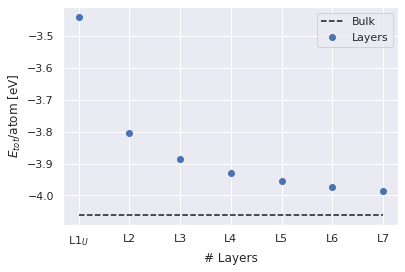

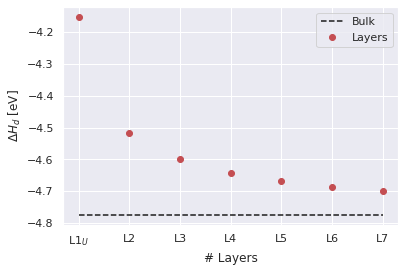

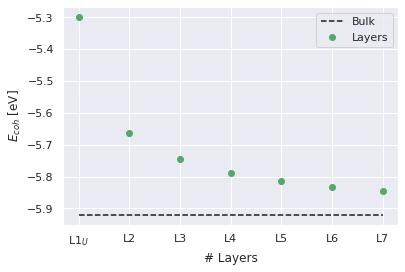

In [12]:
cols = energies.columns
color = ['b', 'r', 'g']
i = 0
for col in cols[2:]:
    

    size = len(energies[col]) - 1
    bulk = np.ones(size)*energies[col][size]


    plt.plot(energies['Structure'][:-1], bulk, '--k')
    plt.plot(energies['Structure'][:-1], energies[col][:-1], 'o' + color[i])
    #plt.title("Energy vs # Layers")
    plt.ylabel(col)
    plt.xlabel("# Layers")
    plt.legend(['Bulk', 'Layers'])
    i += 1
    
    plt.show()

### Interlayer Energy calculations
Extracting the data from the text files and visualize the data in plots

#### Graphite

Text(0, 0.5, 'Energy/atom [ev]')

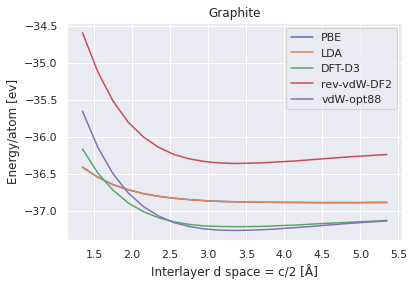

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/Graphite/DFT-D3.txt'
rev = '../Layers/L_L_distance/Graphite/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/Graphite/PBE.txt'
lda = '../Layers/L_L_distance/Graphite/LDA.txt'
vdw = '../Layers/L_L_distance/Graphite/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
x += origo
n = 4 # Number of atoms
plt.plot(x, pbe['energy'])
plt.plot(x, lda['energy'])
plt.plot(x, dft['energy'])
plt.plot(x, rev['energy'])
plt.plot(x, vdw['energy'])
plt.legend(['PBE', 'LDA', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('Graphite')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')

#### BaSi2

##### Layer

Text(0, 0.5, 'Energy/atom [ev]')

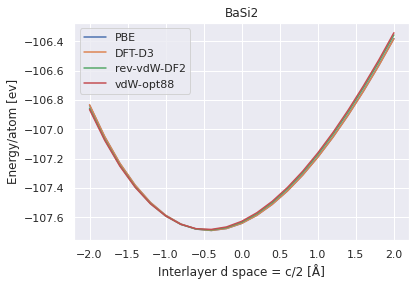

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/BaSi2/Layer/DFT-D3.txt'
rev = '../Layers/L_L_distance/BaSi2/Layer/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/BaSi2/Layer/PBE.txt'
lda = '../Layers/L_L_distance/BaSi2/Layer/LDA.txt'
vdw = '../Layers/L_L_distance/BaSi2/Layer/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, pbe['energy'])
plt.plot(x, dft['energy'])
plt.plot(x, rev['energy'])
plt.plot(x, vdw['energy'])
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')

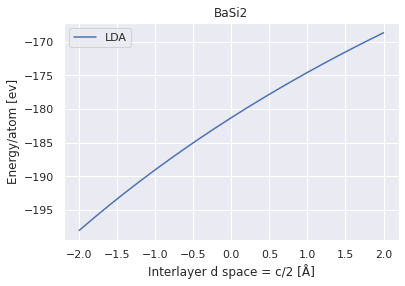

In [15]:
plt.plot(x, (lda['energy']))
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.legend(['LDA'])

##### Bulk

Text(0, 0.5, 'Energy/atom [ev]')

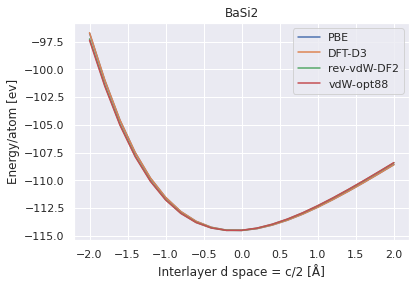

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


dft = '../Layers/L_L_distance/BaSi2/Bulk/DFT-D3.txt'
rev = '../Layers/L_L_distance/BaSi2/Bulk/rev-vdW-DF2.txt'
pbe = '../Layers/L_L_distance/BaSi2/Bulk/PBE.txt'
lda = '../Layers/L_L_distance/BaSi2/Bulk/LDA.txt'
vdw = '../Layers/L_L_distance/BaSi2/Bulk/vdW-opt88.txt'

rev = pd.read_table(rev, delim_whitespace=True)
pbe = pd.read_table(pbe, delim_whitespace=True)
dft = pd.read_table(dft, delim_whitespace=True)
vdw = pd.read_table(vdw, delim_whitespace=True)
lda = pd.read_table(lda, delim_whitespace=True)


# The starting distance between layers
#origo = 3.348000050 # Between atom 1 and 2
x = np.linspace(-2.0, 2, len(rev['energy']))
#x += origo
n = 24 # Number of atoms
plt.plot(x, pbe['energy'])
plt.plot(x, dft['energy'])
plt.plot(x, rev['energy'])
plt.plot(x, vdw['energy'])
plt.legend(['PBE', 'DFT-D3', 'rev-vdW-DF2', 'vdW-opt88'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')


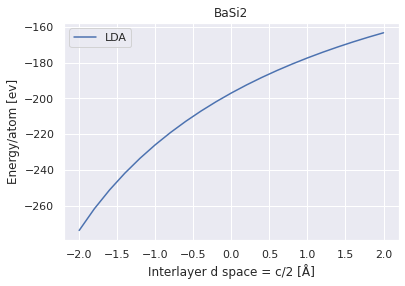

In [17]:
plt.plot(x, lda['energy'])
plt.title('BaSi2')
plt.xlabel('Interlayer d space = c/2 [Å]')
plt.ylabel('Energy/atom [ev]')
plt.legend(['LDA'])

# Density of States

## Total DOS

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L2/DOS
  warnings.warn(


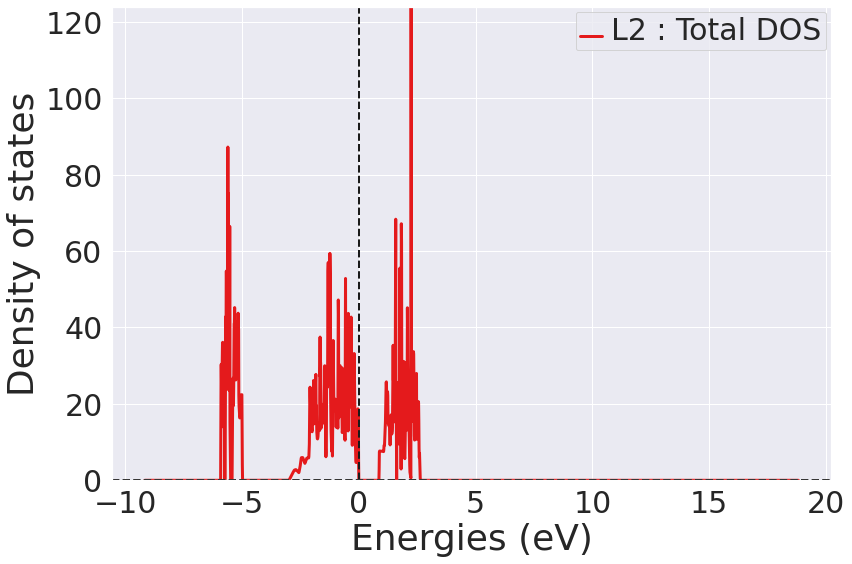

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L3/DOS
  warnings.warn(


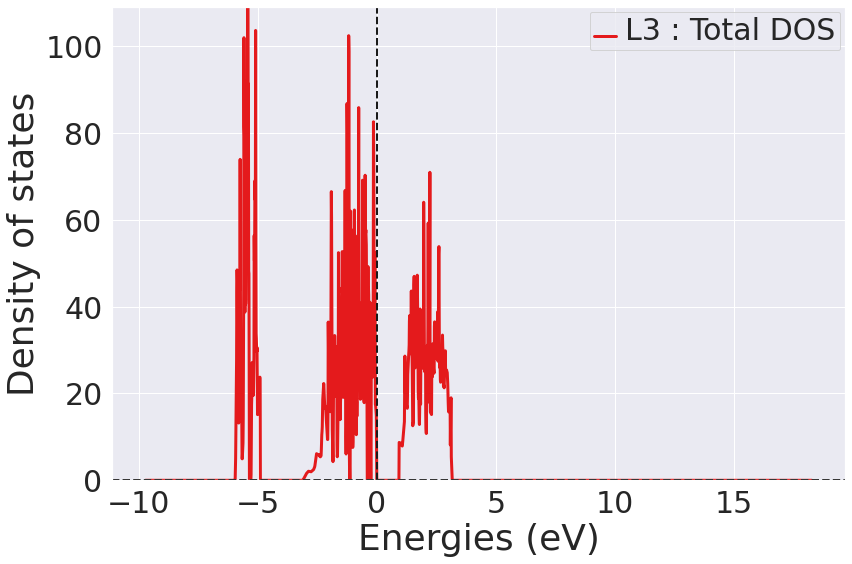

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L4/DOS
  warnings.warn(


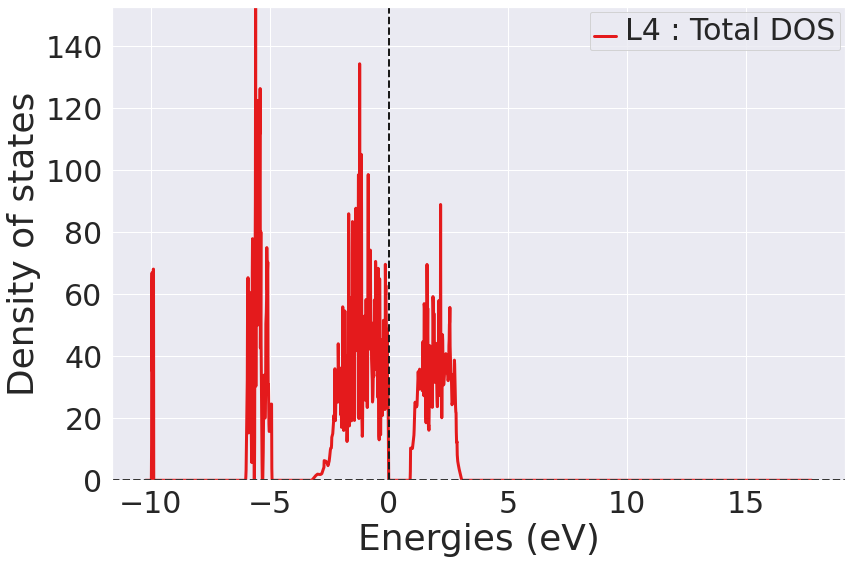

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L5/DOS
  warnings.warn(


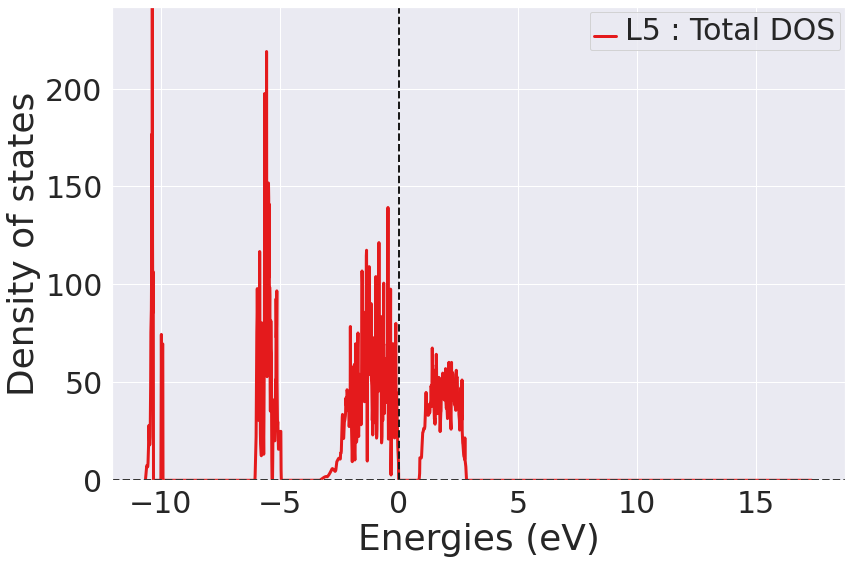

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L6/DOS
  warnings.warn(


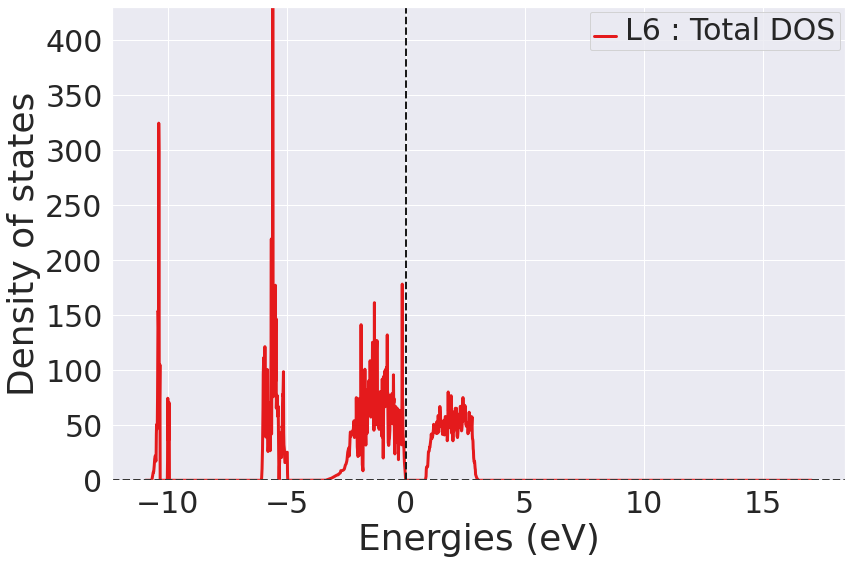

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L7/DOS
  warnings.warn(


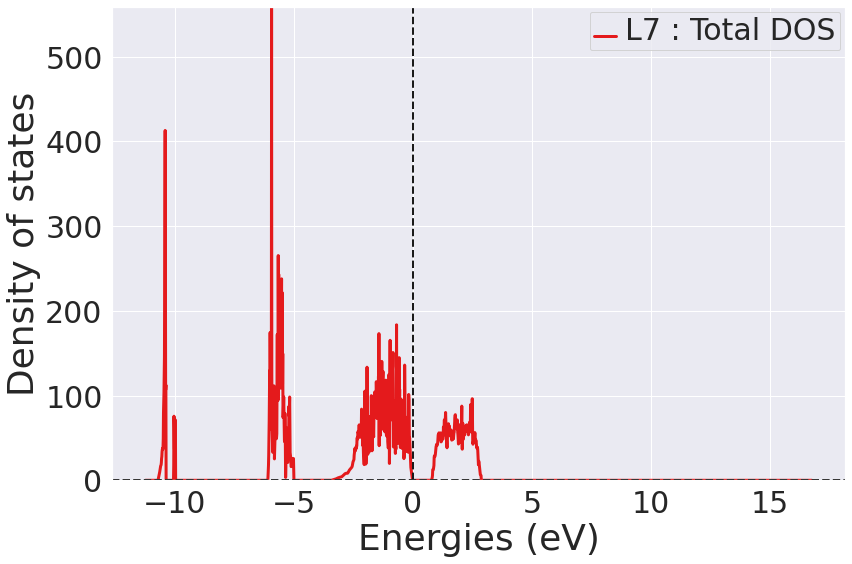

In [18]:
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import DosPlotter, BSPlotter, BSDOSPlotter

folders = ['L2', 'L3', 'L4', 'L5', 'L6', 'L7']

for folder in folders:
        
    thisdir = '../Layers/' + folder + '/DOS/'

    v = Vasprun(thisdir+'vasprun.xml')
    tdos = v.tdos
    plotter = DosPlotter()
    plotter.add_dos(folder + " : Total DOS", tdos)
    plotter.show()

## Elemental DOS

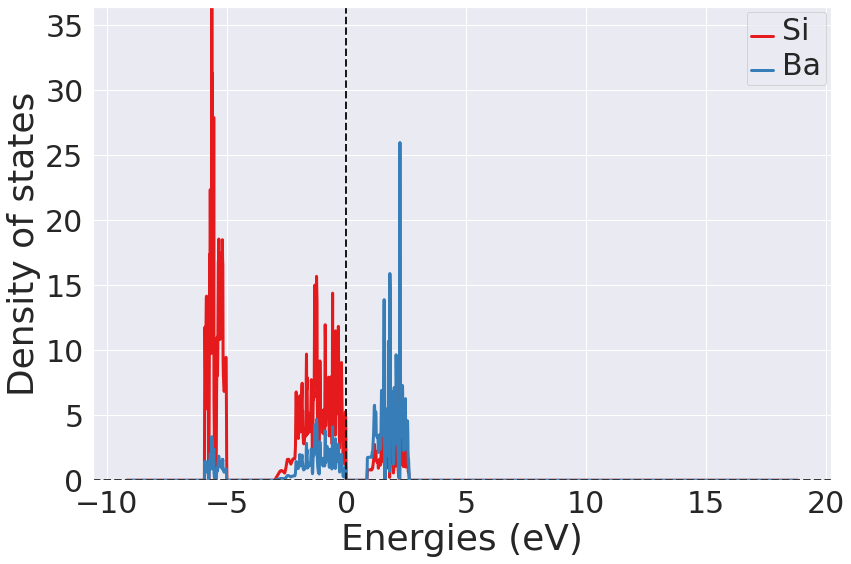

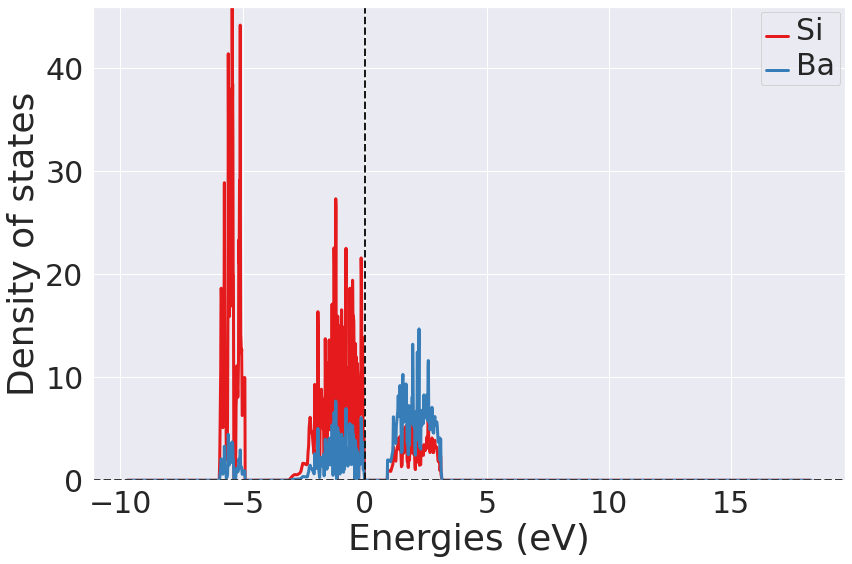

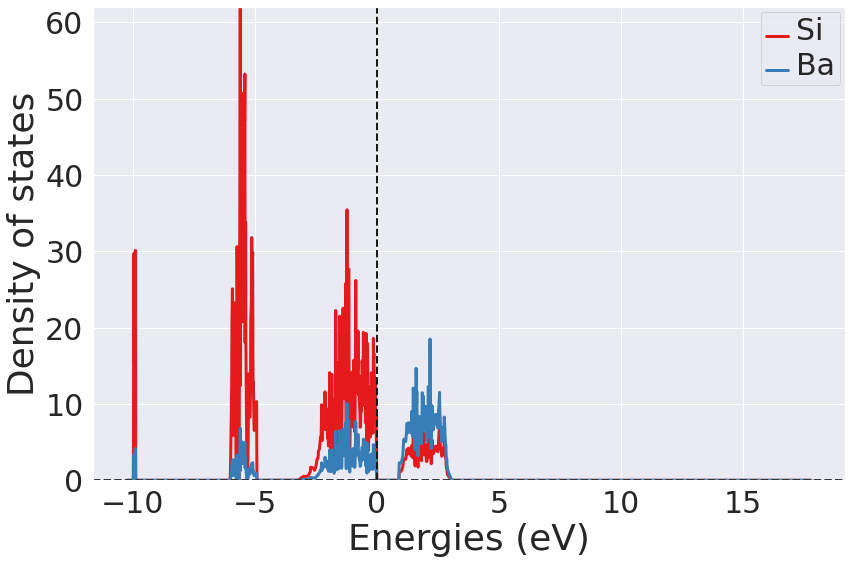

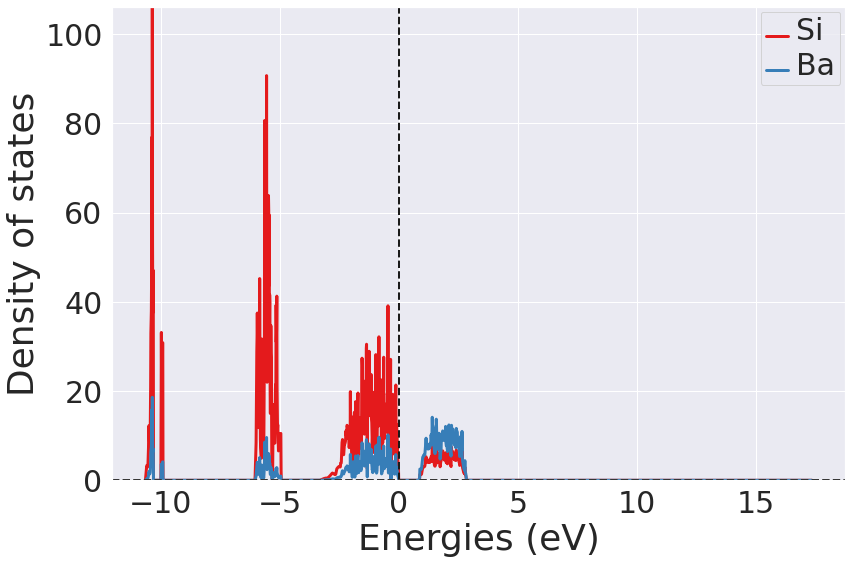

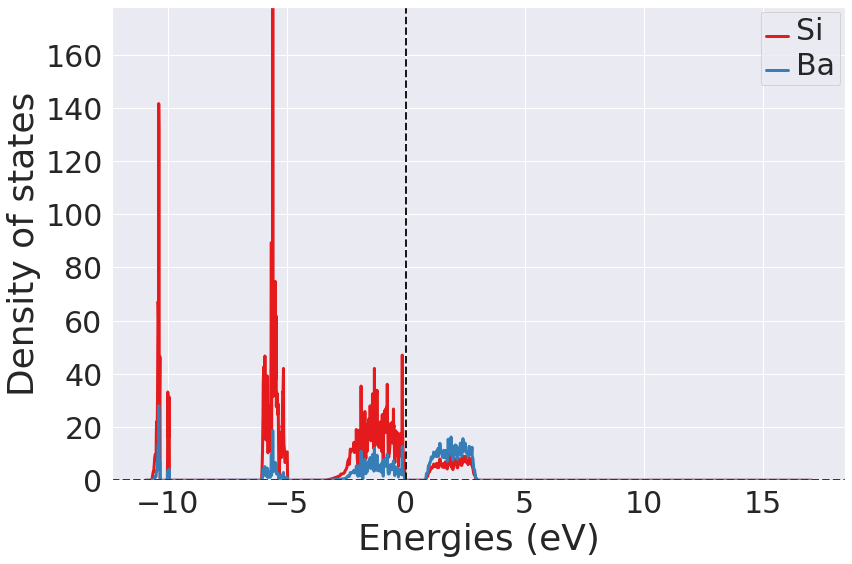

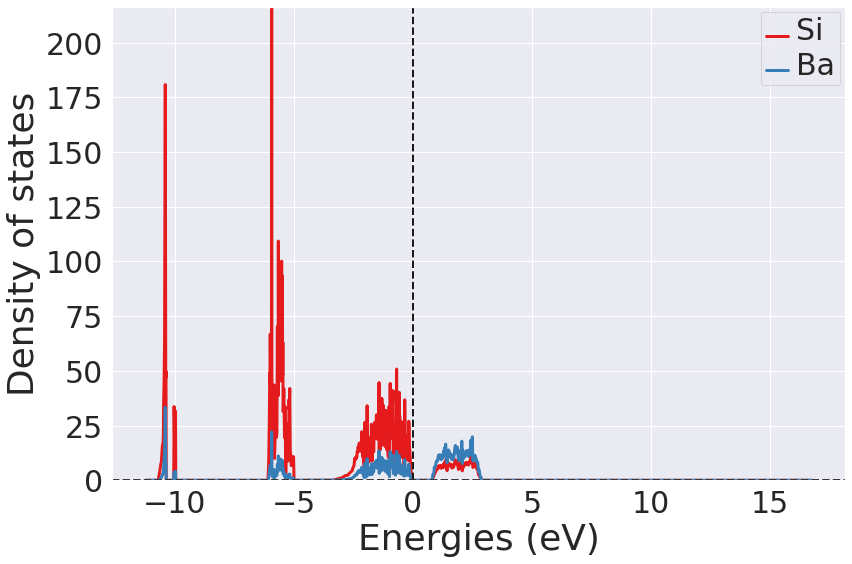

In [19]:

for folder in folders:
    
    thisdir = '../Layers/' + folder + '/DOS/'

    v = Vasprun(thisdir+'vasprun.xml')
    cdos = v.complete_dos
    element_dos = cdos.get_element_dos()
    plotter = DosPlotter()
    plotter.add_dos_dict(element_dos)
    plotter.show()

### Si spd DOS 

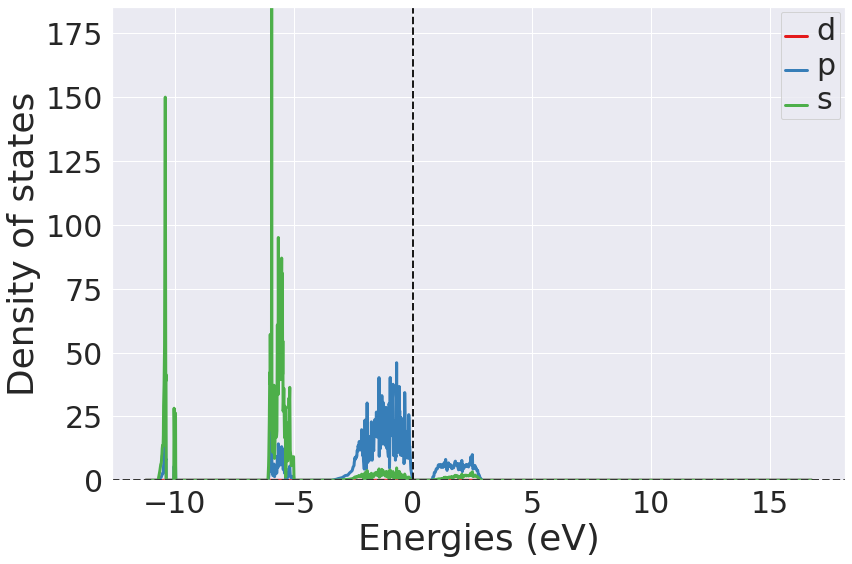

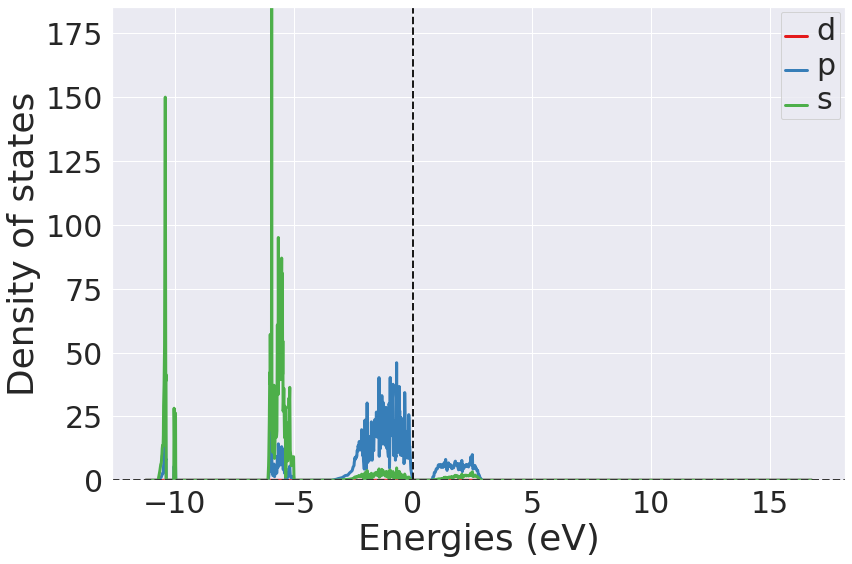

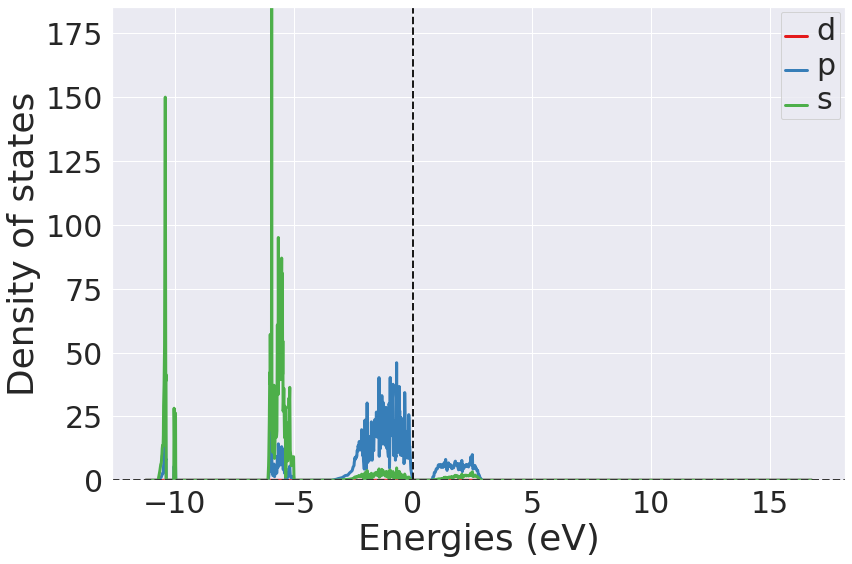

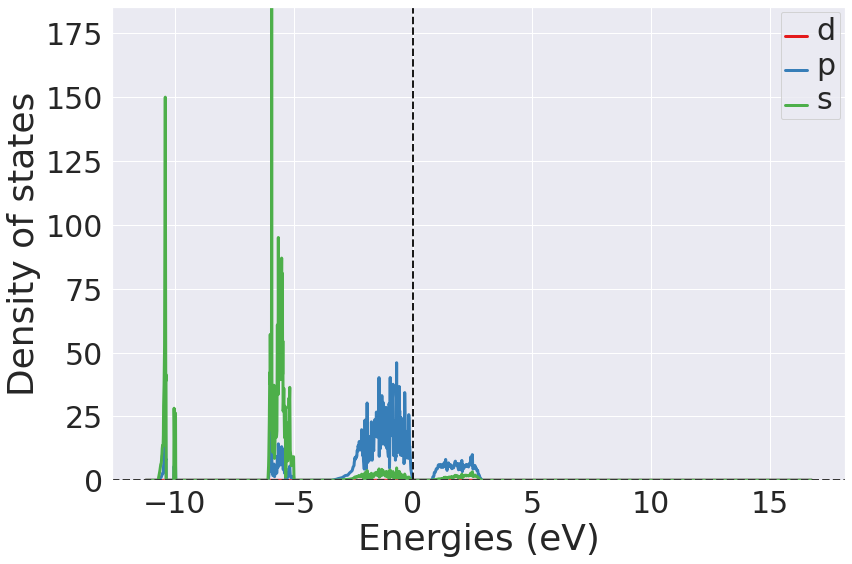

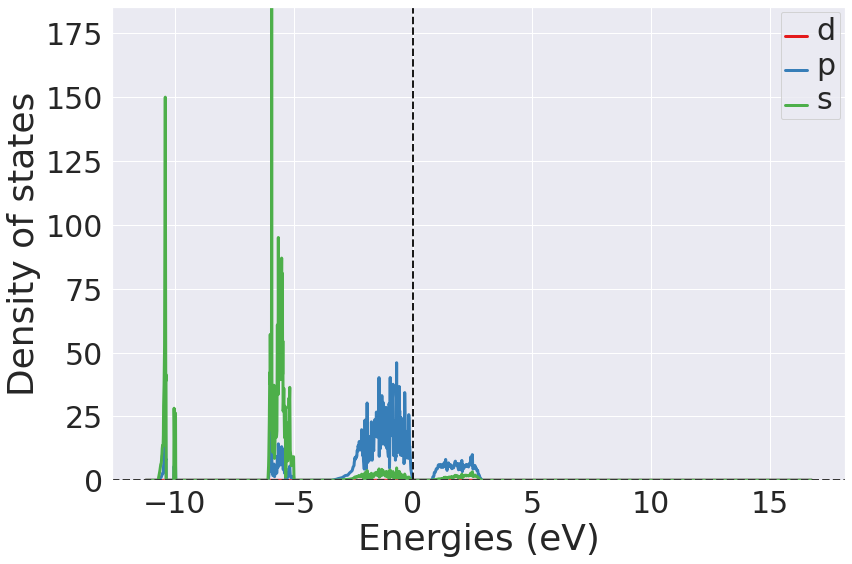

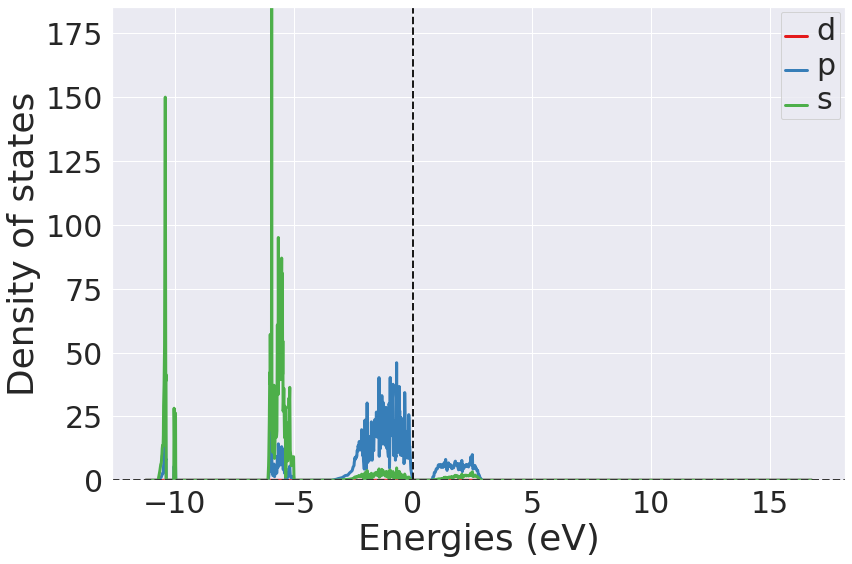

In [20]:

for folder in folders:
        
    thisdir = '../Layers/' + folder + '/DOS/'

    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Si')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

### Ba spd DOS

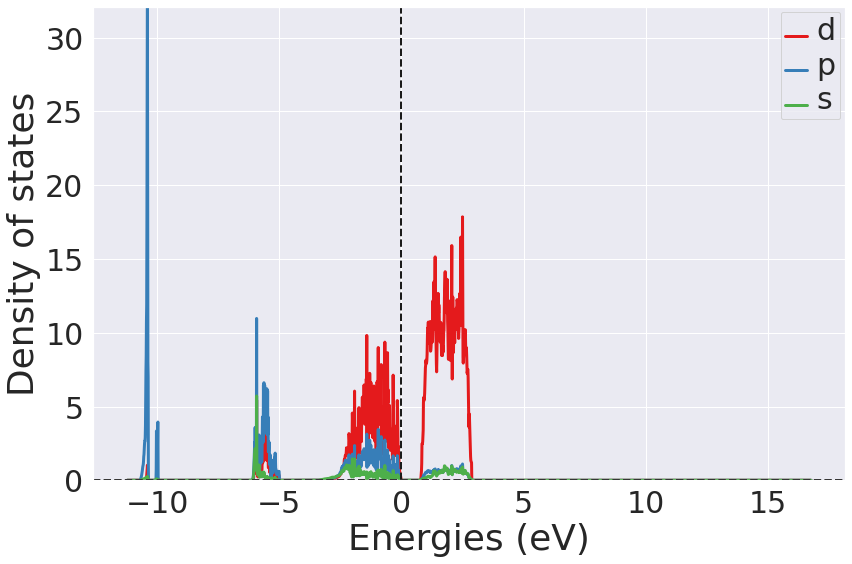

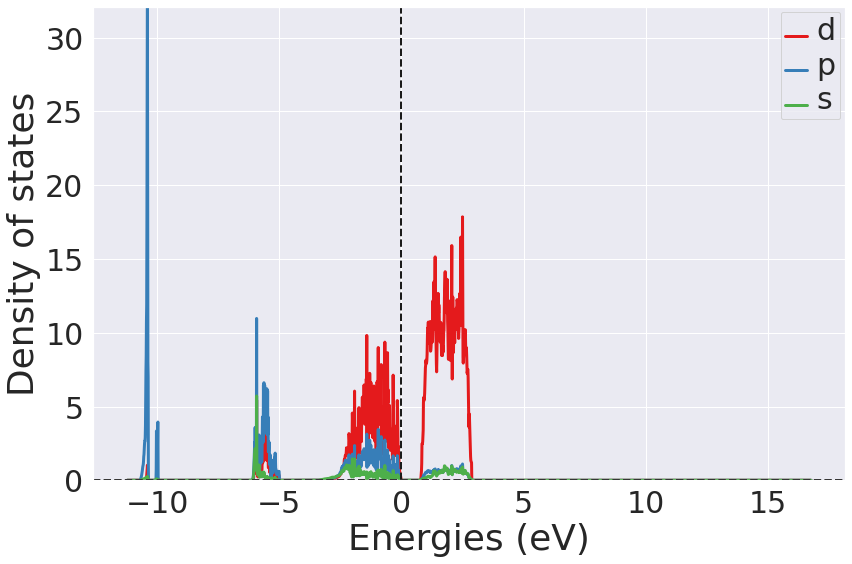

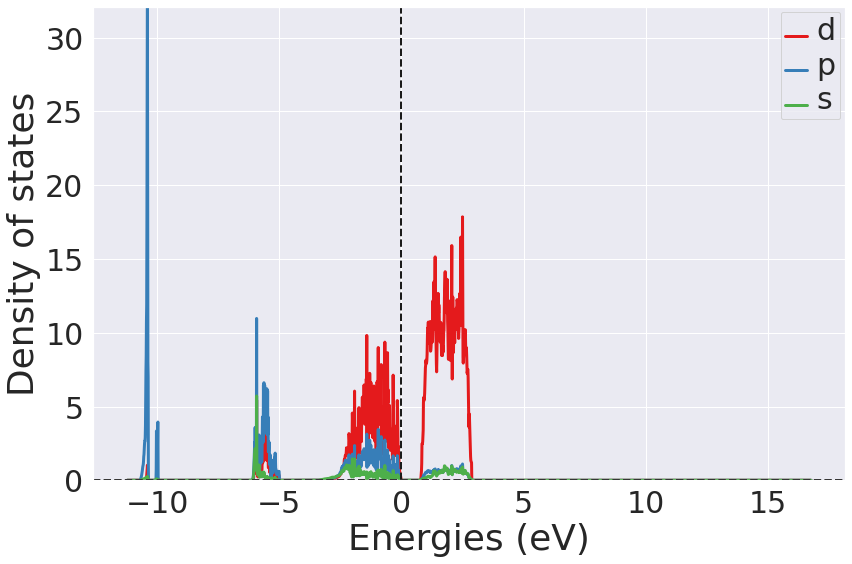

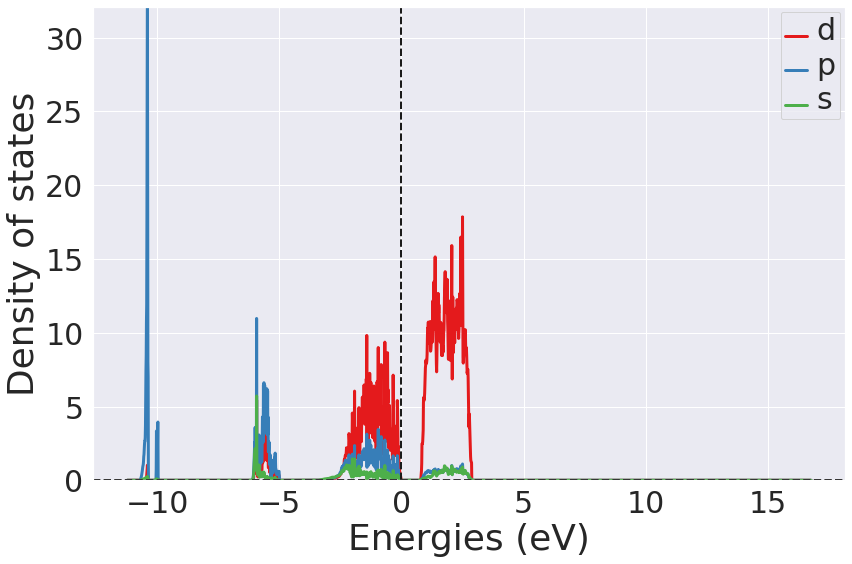

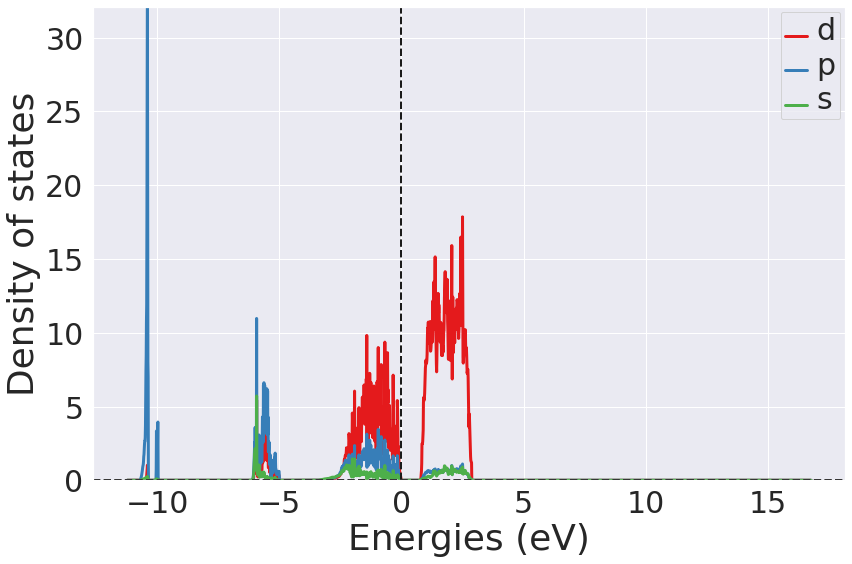

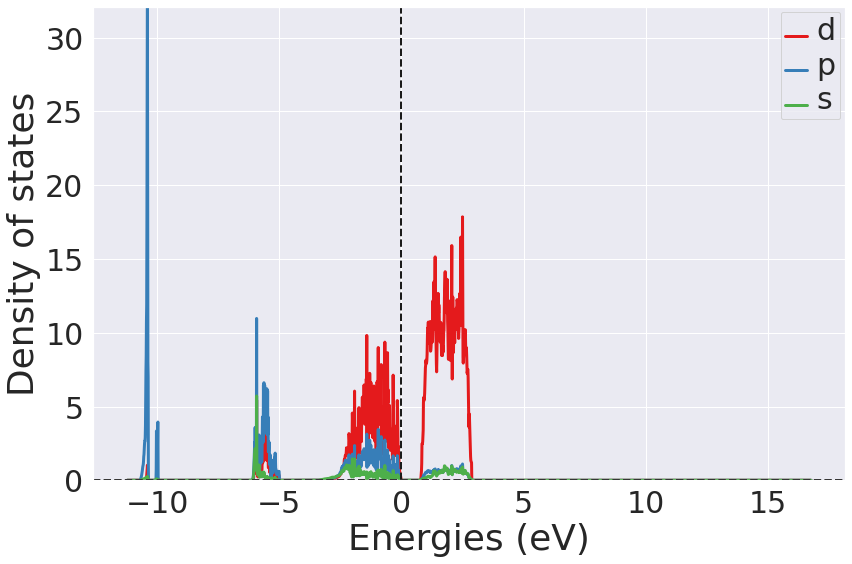

In [21]:

for folder in folders:
    
    thisdir = '../Layers/' + folder + '/DOS/'
    
    cdos = v.complete_dos
    element_spd_dos = cdos.get_element_spd_dos('Ba')
    plotter = DosPlotter()
    plotter.add_dos_dict(element_spd_dos)
    plotter.show()

# Band Structure

/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L2/Band_structure
  warnings.warn(
/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L3/Band_structure
  warnings.warn(
/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L4/Band_structure
  warnings.warn(
/home/moejay10/.local/lib/python3.9/site-packages/pymatgen/io/vasp/outputs.py:1051: UserWarning: No POTCAR file with matching TITEL fields was found in /home/moejay10/UiO/Master/DFT/DFT-Git/Results/Layers/L5/Band_structure
  warnings.warn(
/home/moejay10/.local/lib/python3.9/site

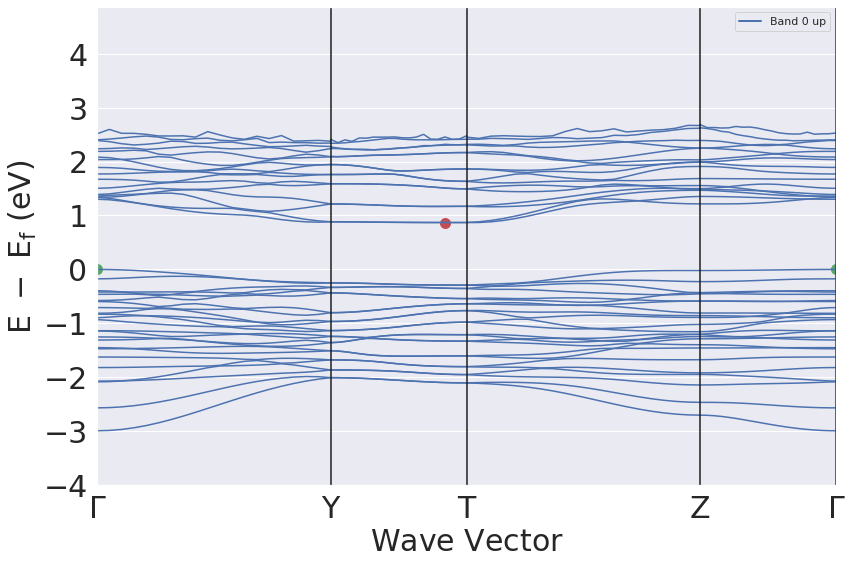

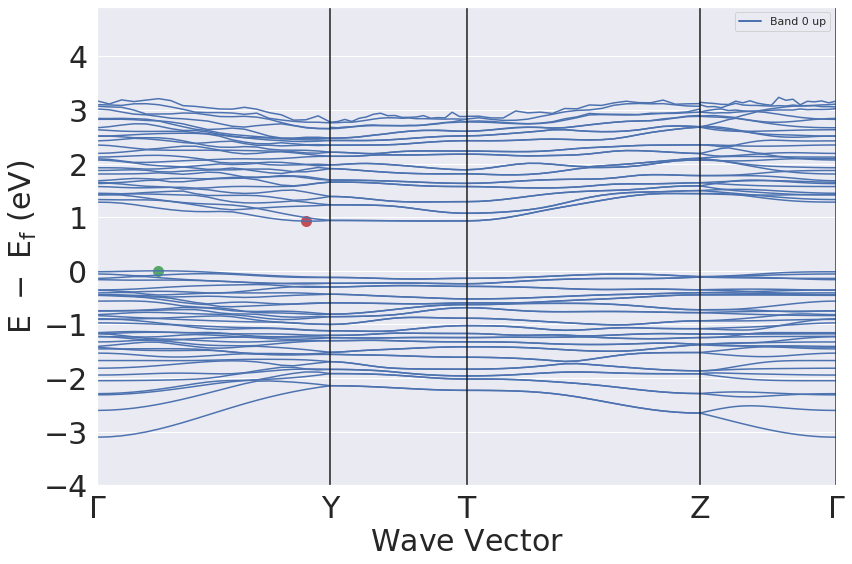

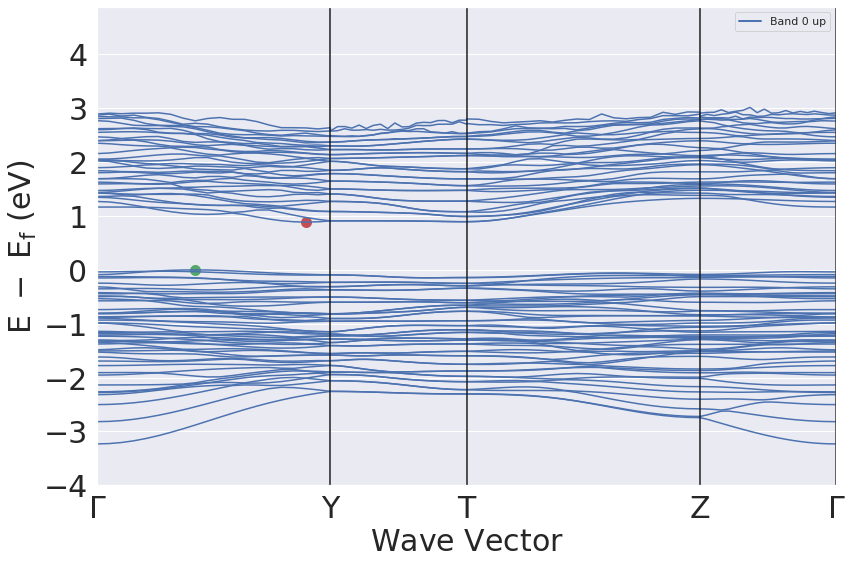

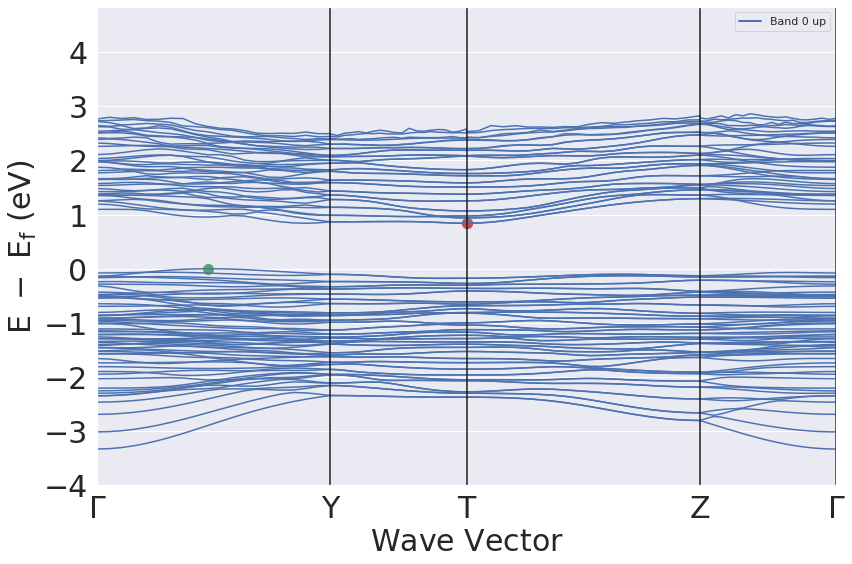

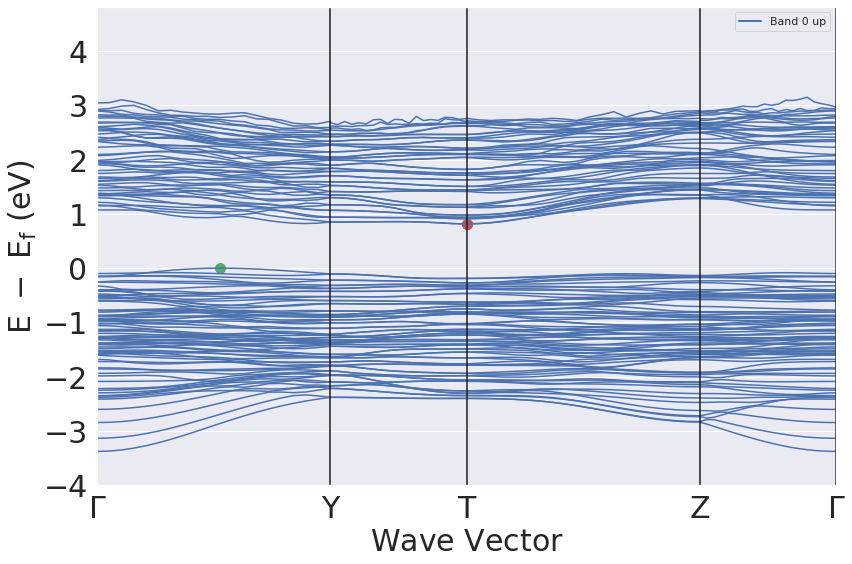

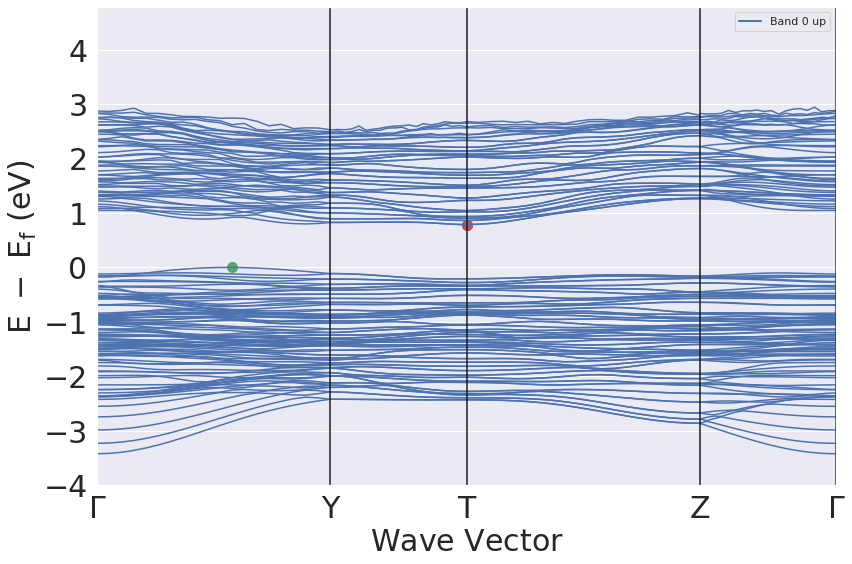

In [33]:
rev_bandgap = []
rev_bandgap.append(0)
for folder in folders:

    thisdir = '../Layers/' + folder + '/Band_structure/'

    v = Vasprun(thisdir + 'vasprun.xml')
    gap = v.eigenvalue_band_properties
    rev_bandgap.append(float(gap[0]))

    v = BSVasprun(thisdir + 'vasprun.xml')
    bs = v.get_band_structure(kpoints_filename=thisdir+'KPOINTS', line_mode=True)
    bs = BSPlotter(bs)
    bs.get_plot(vbm_cbm_marker=True)

rev_bandgap.append(0.6742000000000004)

# Bandgap

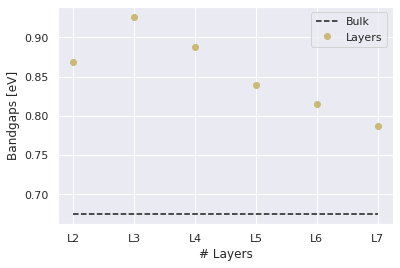

,Structure,$E_{tot}$ [eV],$E_{tot}/$atom [eV],$\Delta H_d$ [eV],$E_{coh}$ [eV],Bandgaps [eV]
0,L1$_U$,-41.276523,-3.439710,-4.152436,-5.298488,0.0000
1,L2,-91.301518,-3.804230,-4.516955,-5.663008,0.8682
2,L3,-139.912792,-3.886466,-4.599192,-5.745245,0.9262
3,L4,-188.607472,-3.929322,-4.642048,-5.788100,0.8871
4,L5,-237.315266,-3.955254,-4.667980,-5.814033,0.8393
5,L6,-286.029806,-3.972636,-4.685362,-5.831414,0.8150
6,L7,-334.751121,-3.985132,-4.697858,-5.843911,0.7865
7,Bulk,-97.450728,-4.060447,-4.773173,-5.919225,0.6742


In [42]:
col = 'Bandgaps [eV]'
energies[col] = rev_bandgap

size = len(energies[col]) - 1
bulk = np.ones(size-1)*energies[col][size]

plt.plot(energies['Structure'][1:-1], bulk, '--k')
plt.plot(energies['Structure'][1:-1], energies[col][1:-1], 'oy')
plt.ylabel(col)
plt.xlabel("# Layers")
plt.legend(['Bulk', 'Layers'])    
plt.show()

energies